# PREDICT SURVIVED PASSENGERS OF R.M.S. TITANIC
## *Using Pipeline, ColumnTransformer*

In [1]:
## Import Common Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### All new data to be used for prediction (including x_test) must undergo exactly the same step as training data (x_train) in the exact same format
#### *DATA LEAKAGE* => condition where Model see/learn/know condition of testing data. This condition must be avoided so that Evaluation Matrix Score for testing data will be more valid and trustworthy. One of the technique to prevent data leakage is **PIPELINE**

In [2]:
## Import data
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


<hr>

## 1. Data Understanding and Data Wrangling

In [3]:
## Check data info
df.info()
## Result: There are 21 columns (11 object, 6 float and 4 integer), few of them got missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [4]:
## Recheck columns name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [5]:
## Check missing value
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

In [6]:
## Feature Selection (manually based on Quick EDA, please refer to Titanic-Using-KNN or Titanic-Using-LogReg project)
df_titanic=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
## Show selected data
df_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0.0
1,1,female,38.0,1,0,71.2833,C,1.0
2,3,female,26.0,0,0,7.9250,S,1.0
3,1,female,35.0,1,0,53.1000,S,1.0
4,3,male,35.0,0,0,8.0500,S,0.0


In [7]:
## Recheck missing value
df_titanic.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

<hr>

## 2. Machine Learning Modelling
## Using `Pipeline`, `ColumnTransformer`, and `KNN`

In [8]:
## Define features and target
x=df_titanic.drop(columns='Survived')
y=df_titanic['Survived']
## Note: there are still missing value and features in object type

In [9]:
## Import package
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold

In [10]:
## Splitting Data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y,random_state=42)

In [11]:
## Define shape of features
print(x_train.shape,x_test.shape)

(712, 7) (179, 7)


In [12]:
## Check Training Features
x_train.head()
## Result: there are still missing value and data in object type

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,3,male,NaN,0,0,56.4958,S
481,2,male,NaN,0,0,0.0000,S
527,1,male,NaN,0,0,221.7792,S
855,3,female,18.0,0,1,9.3500,S
801,2,female,31.0,1,1,26.2500,S


In [13]:
## Check Testing Features
x_test.head()
## Result: there are still missing value and data in object type

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
565,3,male,24.0,2,0,24.1500,S
160,3,male,44.0,0,1,16.1000,S
553,3,male,22.0,0,0,7.2250,C
860,3,male,41.0,2,0,14.1083,S
241,3,female,NaN,1,0,15.5000,Q


### **A. `Pipeline Processing`**

In [14]:
## Add numerical features into variable
num_columns=['Age','SibSp','Parch','Fare']

## Add categorical features into variable
cat_columns=['Pclass','Sex','Embarked']

In [15]:
## Import package
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
# sklearn.impute :
## IterativeImputer => for Regression (numeric)
## KNNImputer => for Missing Value
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, PowerTransformer, OneHotEncoder, StandardScaler

In [16]:
## Feature Engineering with Pipeline (alternative of .fit, .transform)
numeric_pipeline = Pipeline([
    # ('Instruction', Function) # Format of Pipeline
    ('imputer', SimpleImputer(strategy='mean')), # For handling missing value, fill in with mean
    ('scaler', RobustScaler()) # For scaling of numeric features
    ## alternatives : 
    # ('impute', IterativeImputer())
    # ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    # ('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # For handling missing value, fill in with mode (modus)
    ('encoder', OneHotEncoder())
    ## alternative :
    # ('encode', ce.BinaryEncoder(), 'Embarked')
])

#### Scaling `without Pipeline`

In [17]:
## Build Model
scaler = RobustScaler()

In [18]:
## Fit Model
x_train_sc=scaler.fit_transform(x_train[num_columns])
## Show Features
x_train_sc
## Interpretation : Missing value item will remain NaN, result in Array

array([[        nan,  0.        ,  0.        ,  1.81965184],
       [        nan,  0.        ,  0.        , -0.6256092 ],
       [        nan,  0.        ,  0.        ,  8.97347668],
       ...,
       [ 1.08333333,  1.        ,  3.        ,  0.86221553],
       [ 1.02777778,  0.        ,  0.        ,  1.04075449],
       [        nan,  0.        ,  0.        ,  0.52353252]])

#### Scaling `with Pipeline`

In [19]:
## Fit Model
x_train_num=numeric_pipeline.fit_transform(x_train[num_columns])
## Show Features
x_train_num
## Interpretation: missing values have been filled with mean and data has been scalled, result in Array

array([[ 0.        ,  0.        ,  0.        ,  1.81965184],
       [ 0.        ,  0.        ,  0.        , -0.6256092 ],
       [ 0.        ,  0.        ,  0.        ,  8.97347668],
       ...,
       [ 1.29945093,  1.        ,  3.        ,  0.86221553],
       [ 1.22802236,  0.        ,  0.        ,  1.04075449],
       [ 0.        ,  0.        ,  0.        ,  0.52353252]])

In [20]:
## Fit Model
x_train_cat=categoric_pipeline.fit_transform(x_train[cat_columns])
## Show Features
x_train_cat.toarray()
## Interpretation: missing values have been filled with mode and data has been encoded, result in Array

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

### **B. `ColumnTransformer`**

In [21]:
## Import package
from sklearn.compose import ColumnTransformer

In [22]:
## Feature Engineering
preprocessor = ColumnTransformer([
    # Format = ('Instruction', Function, Columns)
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns)
])

    # Notes
    ## Remainder: if there is/are column(s) not included in columns above, want to drop [default] or passthrough
    ### Drop : not included in prediction
    ### Passthrough : not being operated with function (i.e. Scaling), but still included in prediction

In [23]:
## Check Training Features
x_train.head()
# Result: Missing Value and Object Type Data still present

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,3,male,NaN,0,0,56.4958,S
481,2,male,NaN,0,0,0.0000,S
527,1,male,NaN,0,0,221.7792,S
855,3,female,18.0,0,1,9.3500,S
801,2,female,31.0,1,1,26.2500,S


In [24]:
## Check Testing Features
x_test.head()
# Result: Missing Value and Object Type Data still present

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
565,3,male,24.0,2,0,24.1500,S
160,3,male,44.0,0,1,16.1000,S
553,3,male,22.0,0,0,7.2250,C
860,3,male,41.0,2,0,14.1083,S
241,3,female,NaN,1,0,15.5000,Q


In [25]:
## Fit Model
x_train_prep=preprocessor.fit_transform(x_train)
x_test_prep=preprocessor.fit_transform(x_test)

### **C. `KNN Model`**

In [26]:
## Import package
from sklearn.neighbors import KNeighborsClassifier

In [27]:
## Build KNN model
model_KNN=KNeighborsClassifier()

In [28]:
## Fit into KNN Model
model_KNN.fit(x_train_prep,y_train)

KNeighborsClassifier()

### Evaluation Matrix

In [29]:
## Import package
from sklearn.metrics import accuracy_score, classification_report

In [30]:
## Perform prediction
y_pred_tr=model_KNN.predict(x_train_prep)
y_pred_ts=model_KNN.predict(x_test_prep)

In [31]:
## Classification Report - Training
print(classification_report(y_train,y_pred_tr))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       439
         1.0       0.83      0.79      0.81       273

    accuracy                           0.86       712
   macro avg       0.85      0.84      0.85       712
weighted avg       0.85      0.86      0.85       712



In [32]:
## Classification Report - Testing
print(classification_report(y_test,y_pred_ts))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       110
         1.0       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [33]:
## Accuracy Score - Training
accuracy_score(y_train,y_pred_tr).round(4)

0.8553

In [34]:
## Accuracy Score - Test
accuracy_score(y_test,y_pred_ts).round(4)

0.7821

### **A + B + C `Master Pipeline`**

In [35]:
## Build Pipeline
pipeline_KNN=Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

In [36]:
## Fit Into Pipeline
pipeline_KNN.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('algo', KNeighborsClassifier())])

In [37]:
## Perform prediction with Master Pipeline
y_tr=pipeline_KNN.predict(x_train)
y_ts=pipeline_KNN.predict(x_test)

In [38]:
## Classification Report - Training
print(classification_report(y_train,y_tr))
## Result: Exactly the same compared to before using Master Pipeline

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       439
         1.0       0.83      0.79      0.81       273

    accuracy                           0.86       712
   macro avg       0.85      0.84      0.85       712
weighted avg       0.85      0.86      0.85       712



In [39]:
## Classification Report - Test
print(classification_report(y_test,y_ts))
## Result: Exactly the same compared to before using Master Pipeline

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       110
         1.0       0.73      0.64      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



In [40]:
## Accuracy Score - Training
accuracy_score(y_train,y_tr).round(4)
## Result: Exactly the same compared to before using Master Pipeline

0.8553

In [41]:
## Accuracy Score - Testing
accuracy_score(y_test,y_ts).round(4)
## Result: Exactly the same compared to before using Master Pipeline

0.7709

#### **SUMMARY**
1. Before ColumnTransformer
    - Data Input => **`A`** [Pipeline (num) + Pipeline(cat)] => **`C`** Model (KNN)

2. After ColumnTransformer
    - Data Input => **`B`** ColumnTransformer [Pipeline (num) + Pipeline(cat)] => **`C`** Model (KNN)

3. After Master Pipeline
    - Data Input => **`A + B + C`** Master Pipeline [ColumnTransformer [Pipeline (num) + Pipeline(cat)] => Model (KNN)]

### Pipeline Template - KNN

In [42]:
## 1. Define numerical and categorical columns
num_columns=['Age','SibSp','Parch','Fare']
cat_columns=['Pclass','Sex','Embarked']

## 2. Pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
    # handle_unknown='ignore' :
    ## If there is value in testing value, but did not found in training value
    ## We ignore this 'testing-only value' so that the process will still going through

## 3. ColumnTransformer
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns),
])

## 4. Master Pipeline
pipeline_KNN=Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

<hr>

## 3. Pipeline with Logistic Regression using Pipeline Template

In [43]:
## Import Package
from sklearn.linear_model import LogisticRegression

In [44]:
## 4. Master Pipeline
pipeline_LR=Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression())
])

In [45]:
## Fit Into Pipeline
pipeline_LR.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('algo', LogisticRegression())])

In [46]:
## Perform prediction with Master Pipeline
y_tr_LR=pipeline_LR.predict(x_train)
y_ts_LR=pipeline_LR.predict(x_test)

In [47]:
## Classification Report - Training
print(classification_report(y_train,y_tr_LR))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       439
         1.0       0.78      0.75      0.76       273

    accuracy                           0.82       712
   macro avg       0.81      0.81      0.81       712
weighted avg       0.82      0.82      0.82       712



In [48]:
## Classification Report - Test
print(classification_report(y_test,y_ts_LR))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       110
         1.0       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [49]:
## Accuracy Score - Training
accuracy_score(y_train,y_tr_LR).round(4)
## Result: Lower than using KNN Model

0.8216

In [50]:
## Accuracy Score - Testing
accuracy_score(y_test,y_ts_LR).round(4)
## Result: Higher than using KNN Model

0.7989

<hr>

## 4. Evaluation Matrix Scoring

In [51]:
## Import package
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [52]:
## Build Function
def EvaMatrix_Pipeline(model,x_train,x_test,y_train,y_test,Nama):
    Model=model.fit(x_train,y_train)
    y_pred_train=Model.predict(x_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    rec_train=recall_score(y_train,y_pred_train)
    prec_train=precision_score(y_train,y_pred_train)
    f1_train=f1_score(y_train,y_pred_train)

    y_pred_test=Model.predict(x_test)
    acc_test=accuracy_score(y_test,y_pred_test)
    rec_test=recall_score(y_test,y_pred_test)
    prec_test=precision_score(y_test,y_pred_test)
    f1_test=f1_score(y_test,y_pred_test)
    
    data={
    Nama + ' Training':[acc_train,rec_train,prec_train,f1_train],
    Nama + ' Testing':[acc_test,rec_test,prec_test,f1_test]
}

    df=(pd.DataFrame(data,index=['Accuracy','Recall','Precision','F1']).T).round(4)
    cr_train=classification_report(y_train,y_pred_train)
    cm_train=confusion_matrix(y_train,y_pred_train,labels=[1,0])
    df_train=pd.DataFrame(data=cm_train,columns=['Predict 1','Predict 0'],index=['Actual 1','Actual 0'])

    cr_test=classification_report(y_test,y_pred_test)
    cm_test=confusion_matrix(y_test,y_pred_test,labels=[1,0])
    df_test=pd.DataFrame(data=cm_test,columns=['Predict 1','Predict 0'],index=['Actual 1','Actual 0'])

    return df,cr_train,df_train,cr_test,df_test

In [53]:
## Run Function for KNN Model
df_KNN, cr_KNN_train, cm_KNN_train, cr_KNN_test, cm_KNN_test = EvaMatrix_Pipeline(pipeline_KNN, x_train, x_test, y_train, y_test, 'KNN')
## Show result
df_KNN

,Accuracy,Recall,Precision,F1
KNN Training,0.8427,0.7436,0.8286,0.7838
KNN Testing,0.7765,0.6957,0.7164,0.7059


In [54]:
## Run Function for LR Model
df_LR, cr_LR_train, cm_LR_train, cr_LR_test, cm_LR_test = EvaMatrix_Pipeline(pipeline_LR, x_train, x_test, y_train, y_test, 'LogReg')
## Show result
df_LR

,Accuracy,Recall,Precision,F1
LogReg Training,0.8216,0.7473,0.7786,0.7626
LogReg Testing,0.7989,0.6957,0.7619,0.7273


**Result** = 
KNN Model produce lower overall metrics score than Logistic Regression score

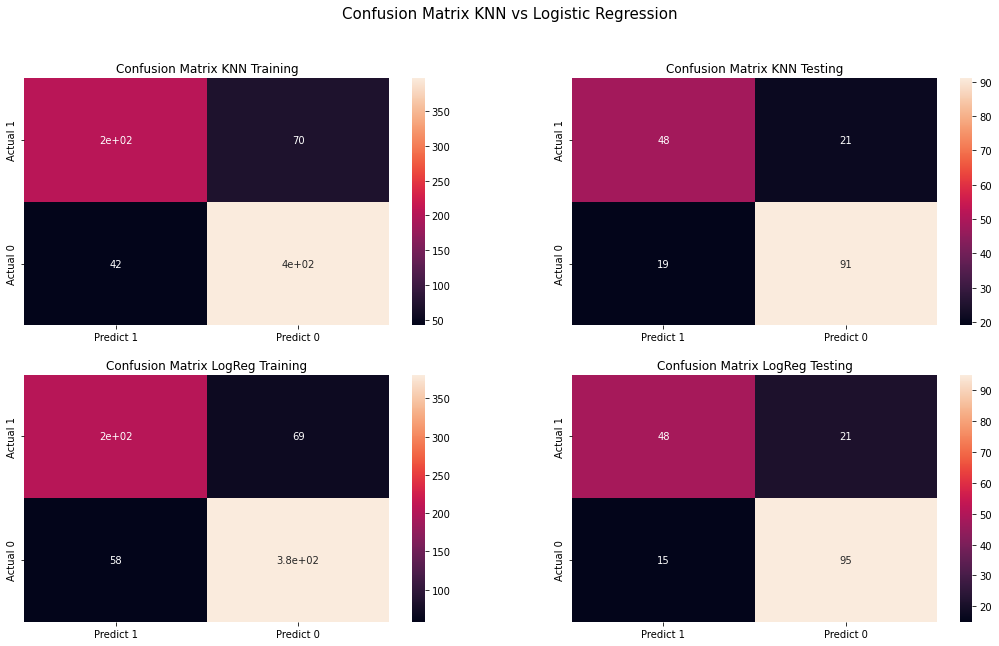

In [55]:
## Confustion Matrix Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('Confusion Matrix KNN vs Logistic Regression',size = 15)

sns.heatmap(ax=axes[0, 0], data=cm_KNN_train, annot=True).set_title('Confusion Matrix KNN Training')
sns.heatmap(ax=axes[0, 1], data=cm_KNN_test, annot=True).set_title('Confusion Matrix KNN Testing')
sns.heatmap(ax=axes[1, 0], data=cm_LR_train, annot=True).set_title('Confusion Matrix LogReg Training')
sns.heatmap(ax=axes[1, 1], data=cm_LR_test, annot=True).set_title('Confusion Matrix LogReg Testing');

<hr>

## 5. Prediction With Manual Input

### `Predict manually`
> pipeline_KNN.predict([[2,'male',20,2,0,120,'Q']])

-> will result in error, data need to be in DataFrame format

#### `Predict with DataFrame`

In [56]:
## Input manual data to dictionary
data={
    'Name':'Baressi',
    'Hometown':'Jakarta',
    'Pclass':1,
    'Sex':'male',
    'Age':42,
    'SibSp':2,
    'Parch':0,
    'Fare':120,
    'Baggage':25,
    'Embarked':'Q',
    'Email':'barr@gmail.com'
}
## Convert into DataFrame
barr=pd.DataFrame(data,index=[1])
## Show Data
barr

,Name,Hometown,Pclass,Sex,Age,SibSp,Parch,Fare,Baggage,Embarked,Email
1,Baressi,Jakarta,1,male,42,2,0,120,25,Q,barr@gmail.com


In [57]:
## Predict with KKN
pipeline_KNN.predict(barr)
# Result: Survived

array([1.])

In [58]:
## Probability
pipeline_KNN.predict_proba(barr)[0][1]
# Result: There is 60% chance this passenger will survived

0.6

<hr>

## 6. Hyper Parameter Tuning

### KNN Model

In [59]:
# Tuning done to Pipeline instead to Model
## Show Parameter in Pipeline KNN
pipeline_KNN.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler()),
                                                    ('poly',
                                                     PolynomialFeatures(include_bias=False)),
                                                    ('power',
                                                     PowerTransformer())]),
                                    ['Age', 'SibSp', 'Parch', 'Fare']),
                                   ('categoric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                      

In [60]:
## Define Tuning Parameter in Dictionary Format
param_KNN={
    'algo__n_neighbors':range(1,70,2),
    'algo__weights':['uniform','distance'],
    'algo__p':[1,2],
    'prep__numeric__poly__degree':[2,3,4,5]
}

In [61]:
## Define skf Model for GridSearch
skf=StratifiedKFold(n_splits=5)

In [62]:
## Run GridSearch Model
pipe_KNN_GS=GridSearchCV(pipeline_KNN,
                            param_KNN,
                            cv=skf,
                            n_jobs=-1,
                            verbose=1,
                            scoring='accuracy')
## Fit Model
pipe_KNN_GS.fit(x_train,y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('power',
                                                                                          PowerTransformer())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categoric',
                                                                         P...imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': range(1, 70, 2),
                         'algo__p': [1, 2],
                         'algo__weights': ['uniform', 'distance'],
                         'prep__numeric__poly__degree': [2, 3, 4, 5]},
             scoring='accuracy', verbose=1)

In [63]:
## Run Function for KNN with GridSearch Model
df_KNN_GS, cr_KNN_GS_train, cm_KNN_GS_train, cr_KNN_GS_test, cm_KNN_GS_test = EvaMatrix_Pipeline(pipe_KNN_GS, 
                                                                                                    x_train, 
                                                                                                    x_test, 
                                                                                                    y_train, 
                                                                                                    y_test, 
                                                                                                    'KNN + GridSearch')
## Show result
df_KNN_GS

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


,Accuracy,Recall,Precision,F1
KNN + GridSearch Training,0.8287,0.7363,0.8008,0.7672
KNN + GridSearch Testing,0.7486,0.6377,0.6875,0.6617


### LogReg Model

In [64]:
## Define tuning parameter
param_LR={
    'algo__C':np.arange(0.001,5,0.001),
    'algo__penalty':['l2','l1','elasticnet']
}

In [65]:
## Build GridSearch Model
LR_GS=GridSearchCV(pipeline_LR,
                        param_LR,
                        cv=skf,
                        n_jobs=-1,
                        verbose=1,
                        scoring='accuracy')

## Fit Model
LR_GS.fit(x_train,y_train)

Fitting 5 folds for each of 14997 candidates, totalling 74985 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('power',
                                                                                          PowerTransformer())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categoric',
                                                                         P...eps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('algo', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'algo__C': array([1.000e-03, 2.000e-03, 3.000e-03, ..., 4.997e+00, 4.998e+00,
       4.999e+00]),
                         'algo__penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [66]:
## Run Function for LogReg with GridSearch Model
df_LR_GS, cr_LR_GS_train, cm_LR_GS_train, cr_LR_GS_test, cm_LR_GS_test = EvaMatrix_Pipeline(LR_GS, 
                                                                                                    x_train, 
                                                                                                    x_test, 
                                                                                                    y_train, 
                                                                                                    y_test, 
                                                                                                    'LogReg + GridSearch')
## Show result
df_LR_GS

Fitting 5 folds for each of 14997 candidates, totalling 74985 fits


,Accuracy,Recall,Precision,F1
LogReg + GridSearch Training,0.8174,0.7106,0.7918,0.7490
LogReg + GridSearch Testing,0.8045,0.6957,0.7742,0.7328


<hr>

## 7. Summary

In [67]:
## Comparation of Evaluation Matrix Score
summary=pd.concat([df_KNN, df_LR, df_KNN_GS, df_LR_GS])
summary

,Accuracy,Recall,Precision,F1
KNN Training,0.8427,0.7436,0.8286,0.7838
KNN Testing,0.7765,0.6957,0.7164,0.7059
LogReg Training,0.8216,0.7473,0.7786,0.7626
LogReg Testing,0.7989,0.6957,0.7619,0.7273
KNN + GridSearch Training,0.8287,0.7363,0.8008,0.7672
KNN + GridSearch Testing,0.7486,0.6377,0.6875,0.6617
LogReg + GridSearch Training,0.8174,0.7106,0.7918,0.7490
LogReg + GridSearch Testing,0.8045,0.6957,0.7742,0.7328


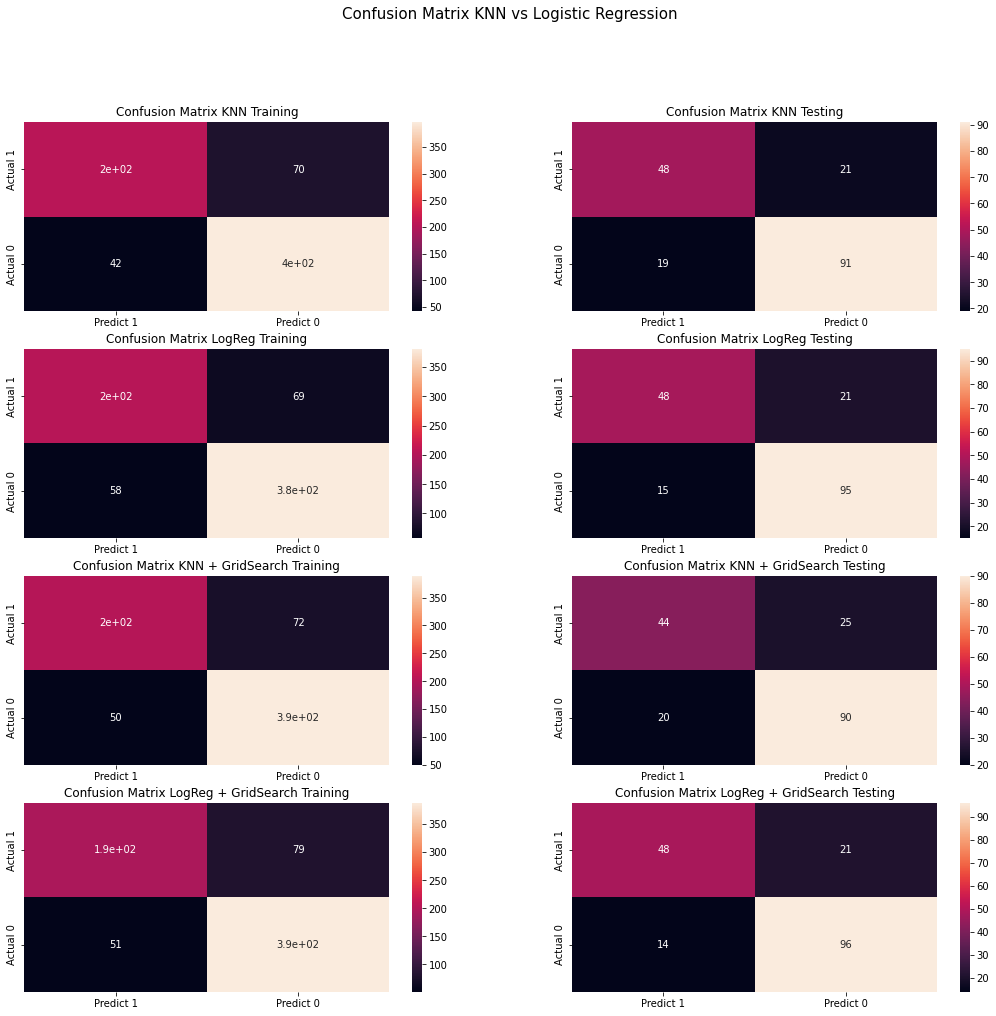

In [68]:
## Confusion Matrix Visualization
fig, axes = plt.subplots(4, 2, figsize=(18, 16))
 
fig.suptitle('Confusion Matrix KNN vs Logistic Regression',size = 15)

sns.heatmap(ax=axes[0, 0], data=cm_KNN_train, annot=True).set_title('Confusion Matrix KNN Training')
sns.heatmap(ax=axes[0, 1], data=cm_KNN_test, annot=True).set_title('Confusion Matrix KNN Testing')
sns.heatmap(ax=axes[1, 0], data=cm_LR_train, annot=True).set_title('Confusion Matrix LogReg Training')
sns.heatmap(ax=axes[1, 1], data=cm_LR_test, annot=True).set_title('Confusion Matrix LogReg Testing')
sns.heatmap(ax=axes[2, 0], data=cm_KNN_GS_train, annot=True).set_title('Confusion Matrix KNN + GridSearch Training')
sns.heatmap(ax=axes[2, 1], data=cm_KNN_GS_test, annot=True).set_title('Confusion Matrix KNN + GridSearch Testing')
sns.heatmap(ax=axes[3, 0], data=cm_LR_GS_train, annot=True).set_title('Confusion Matrix LogReg + GridSearch Training')
sns.heatmap(ax=axes[3, 1], data=cm_LR_GS_test, annot=True).set_title('Confusion Matrix LogReg + GridSearch Testing');

<hr>

## 7. Manual Tuning with Best Parameter from Hyper-Parameter Tuning

In [69]:
## Best Tuning Score and Parameter
print('Best KNN GridSearch Tuning Score: ', pipe_KNN_GS.best_score_.round(4))
print('Best LogReg GridSearch Tuning Score: ',LR_GS.best_score_.round(4))
print('#'*50)
print('Best KNN GridSearch Tuning Parameter: ', pipe_KNN_GS.best_params_)
print('Best LogReg GridSearch Tuning Parameter: ',LR_GS.best_params_)

Best KNN GridSearch Tuning Score:  0.8006
Best LogReg GridSearch Tuning Score:  0.8104
##################################################
Best KNN GridSearch Tuning Parameter:  {'algo__n_neighbors': 7, 'algo__p': 1, 'algo__weights': 'uniform', 'prep__numeric__poly__degree': 2}
Best LogReg GridSearch Tuning Parameter:  {'algo__C': 0.061, 'algo__penalty': 'l2'}


In [70]:
## Insert Best Parameter into Model
KNN_Tuned=pipe_KNN_GS.best_estimator_
LR_Tuned=LR_GS.best_estimator_

In [71]:
## Run Function for KNN with GridSearch Model (after Tuning)
df_KNN_Tuned, cr_KNN_Tuned_train, cm_KNN_Tuned_train, cr_KNN_Tuned_test, cm_KNN_Tuned_test = EvaMatrix_Pipeline(KNN_Tuned, 
                                                                                                    x_train, 
                                                                                                    x_test, 
                                                                                                    y_train, 
                                                                                                    y_test, 
                                                                                                    'KNN + GridSearch Tuned')
## Show result
df_KNN_Tuned

,Accuracy,Recall,Precision,F1
KNN + GridSearch Tuned Training,0.8287,0.7363,0.8008,0.7672
KNN + GridSearch Tuned Testing,0.7486,0.6377,0.6875,0.6617


In [72]:
## Run Function for LogReg with GridSearch Model (after Tuning)
df_LR_Tuned, cr_LR_Tuned_train, cm_LR_Tuned_train, cr_LR_Tuned_test, cm_LR_Tuned_test = EvaMatrix_Pipeline(LR_Tuned, 
                                                                                                    x_train, 
                                                                                                    x_test, 
                                                                                                    y_train, 
                                                                                                    y_test, 
                                                                                                    'LogReg + GridSearch Tuned')
## Show result
df_LR_Tuned

,Accuracy,Recall,Precision,F1
LogReg + GridSearch Tuned Training,0.8174,0.7106,0.7918,0.7490
LogReg + GridSearch Tuned Testing,0.8045,0.6957,0.7742,0.7328


In [73]:
## Concatenate with Evaluation Matrix Score before Tuning
summary_tuned=pd.concat([summary,df_KNN_Tuned,df_LR_Tuned])
summary_tuned

,Accuracy,Recall,Precision,F1
KNN Training,0.8427,0.7436,0.8286,0.7838
KNN Testing,0.7765,0.6957,0.7164,0.7059
LogReg Training,0.8216,0.7473,0.7786,0.7626
LogReg Testing,0.7989,0.6957,0.7619,0.7273
KNN + GridSearch Training,0.8287,0.7363,0.8008,0.7672
KNN + GridSearch Testing,0.7486,0.6377,0.6875,0.6617
LogReg + GridSearch Training,0.8174,0.7106,0.7918,0.7490
LogReg + GridSearch Testing,0.8045,0.6957,0.7742,0.7328
KNN + GridSearch Tuned Training,0.8287,0.7363,0.8008,0.7672
KNN + GridSearch Tuned Testing,0.7486,0.6377,0.6875,0.6617


''

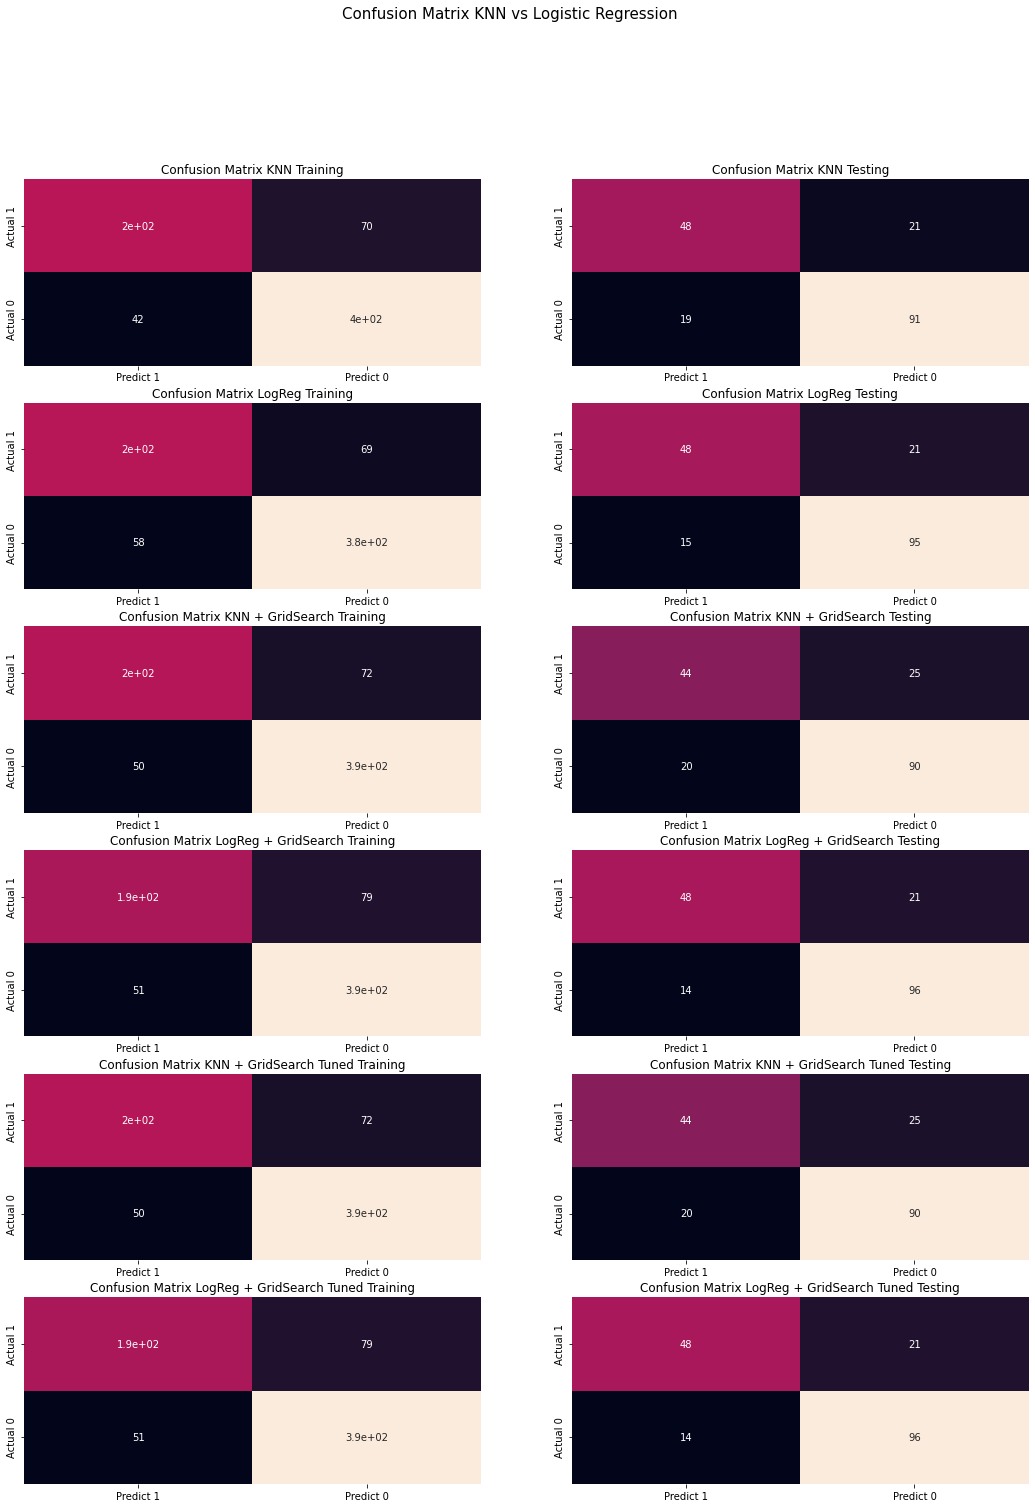

In [74]:
## Confusion Matrix Visualization
fig, axes = plt.subplots(6, 2, figsize=(18, 24))
 
fig.suptitle('Confusion Matrix KNN vs Logistic Regression',size = 15)

sns.heatmap(ax=axes[0, 0], data=cm_KNN_train, annot=True,cbar=False).set_title('Confusion Matrix KNN Training')
sns.heatmap(ax=axes[0, 1], data=cm_KNN_test, annot=True,cbar=False).set_title('Confusion Matrix KNN Testing')
sns.heatmap(ax=axes[1, 0], data=cm_LR_train, annot=True,cbar=False).set_title('Confusion Matrix LogReg Training')
sns.heatmap(ax=axes[1, 1], data=cm_LR_test, annot=True,cbar=False).set_title('Confusion Matrix LogReg Testing')
sns.heatmap(ax=axes[2, 0], data=cm_KNN_GS_train, annot=True,cbar=False).set_title('Confusion Matrix KNN + GridSearch Training')
sns.heatmap(ax=axes[2, 1], data=cm_KNN_GS_test, annot=True,cbar=False).set_title('Confusion Matrix KNN + GridSearch Testing')
sns.heatmap(ax=axes[3, 0], data=cm_LR_GS_train, annot=True,cbar=False).set_title('Confusion Matrix LogReg + GridSearch Training')
sns.heatmap(ax=axes[3, 1], data=cm_LR_GS_test, annot=True,cbar=False).set_title('Confusion Matrix LogReg + GridSearch Testing')
sns.heatmap(ax=axes[4, 0], data=cm_KNN_Tuned_train, annot=True,cbar=False).set_title('Confusion Matrix KNN + GridSearch Tuned Training')
sns.heatmap(ax=axes[4, 1], data=cm_KNN_Tuned_test, annot=True,cbar=False).set_title('Confusion Matrix KNN + GridSearch Tuned Testing')
sns.heatmap(ax=axes[5, 0], data=cm_LR_Tuned_train, annot=True,cbar=False).set_title('Confusion Matrix LogReg + GridSearch Tuned Training')
sns.heatmap(ax=axes[5, 1], data=cm_LR_Tuned_test, annot=True,cbar=False).set_title('Confusion Matrix LogReg + GridSearch Tuned Testing')
;

<hr>

## Build Function to Evaluation Matrix Scoring

In [75]:
## Build For Loop
algo=[pipeline_KNN, pipeline_LR, pipe_KNN_GS, LR_GS, KNN_Tuned, LR_Tuned]
name=['KNN','LogReg','KNN GridSearch','LogReg GridSearch','KNN Tuned','LogReg Tuned']
df_=[]
cr_train=[]
cm_train=[]
cr_test=[]
cm_test=[]

for i in range(6):
    df_1, cr_1, cm_1, cr_2, cm_2 = EvaMatrix_Pipeline(algo[i], x_train, x_test, y_train, y_test, name[i])
    df_.append(df_1)
    cr_train.append(cr_1)
    cm_train.append(cm_1)
    cr_test.append(cr_2)
    cm_test.append(cm_2)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
Fitting 5 folds for each of 14997 candidates, totalling 74985 fits


In [76]:
## Evaluation Matrix Comparison
pd.concat([df_[0], df_[1], df_[2], df_[3], df_[4], df_[5]])

,Accuracy,Recall,Precision,F1
KNN Training,0.8427,0.7436,0.8286,0.7838
KNN Testing,0.7765,0.6957,0.7164,0.7059
LogReg Training,0.8216,0.7473,0.7786,0.7626
LogReg Testing,0.7989,0.6957,0.7619,0.7273
KNN GridSearch Training,0.8287,0.7363,0.8008,0.7672
KNN GridSearch Testing,0.7486,0.6377,0.6875,0.6617
LogReg GridSearch Training,0.8174,0.7106,0.7918,0.7490
LogReg GridSearch Testing,0.8045,0.6957,0.7742,0.7328
KNN Tuned Training,0.8287,0.7363,0.8008,0.7672
KNN Tuned Testing,0.7486,0.6377,0.6875,0.6617


In [77]:
## Classification Report - Training Set
for i in range(6):
    print(f'Classification Report {name[i]} Training')
    print(cr_train[i])
    print('='*58)

Classification Report KNN Training
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       439
         1.0       0.83      0.74      0.78       273

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712

Classification Report LogReg Training
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       439
         1.0       0.78      0.75      0.76       273

    accuracy                           0.82       712
   macro avg       0.81      0.81      0.81       712
weighted avg       0.82      0.82      0.82       712

Classification Report KNN GridSearch Training
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       439
         1.0       0.80      0.74      0.77       273

    accuracy                           0.83       712
   macro 

In [78]:
## Classification Report - Testing Set
for i in range(6):
    print(f'Classification Report {name[i]} Testing')
    print(cr_test[i])
    print('='*58)

Classification Report KNN Testing
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       110
         1.0       0.72      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

Classification Report LogReg Testing
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       110
         1.0       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

Classification Report KNN GridSearch Testing
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       110
         1.0       0.69      0.64      0.66        69

    accuracy                           0.75       179
   macro avg

,Predict 1,Predict 0
Actual 1,203,70
Actual 0,42,397


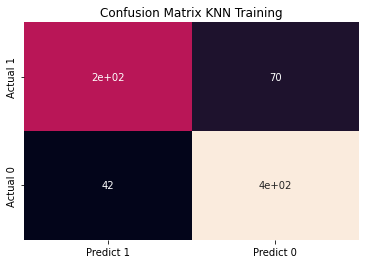

-------------------------------------------------------


,Predict 1,Predict 0
Actual 1,204,69
Actual 0,58,381


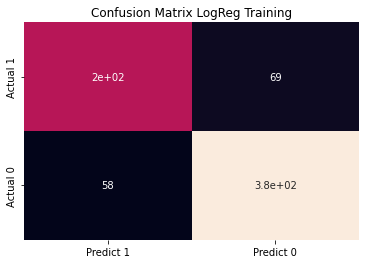

-------------------------------------------------------


,Predict 1,Predict 0
Actual 1,201,72
Actual 0,50,389


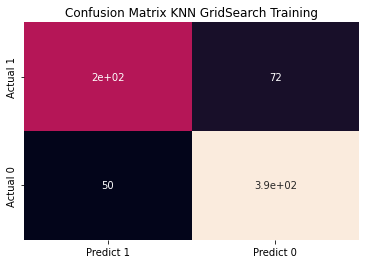

-------------------------------------------------------


,Predict 1,Predict 0
Actual 1,194,79
Actual 0,51,388


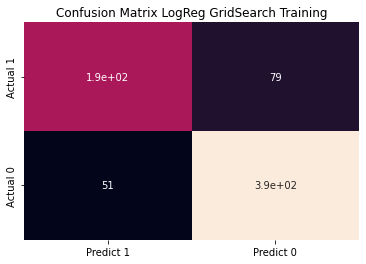

-------------------------------------------------------


,Predict 1,Predict 0
Actual 1,201,72
Actual 0,50,389


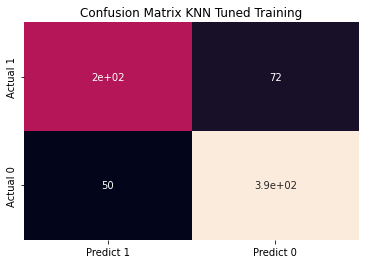

-------------------------------------------------------


,Predict 1,Predict 0
Actual 1,194,79
Actual 0,51,388


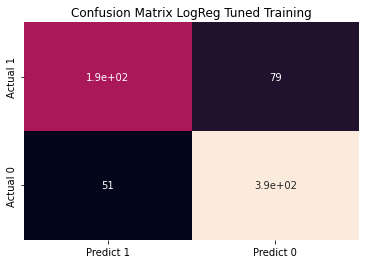

-------------------------------------------------------


In [79]:
## Confusion Matrix - Training Set
for i in range(6):
    display(cm_train[i])
    sns.heatmap(cm_train[i],annot=True,cbar=False)
    plt.title(f'Confusion Matrix {name[i]} Training')
    plt.show()
    print('-'*55)

,Predict 1,Predict 0
Actual 1,48,21
Actual 0,19,91


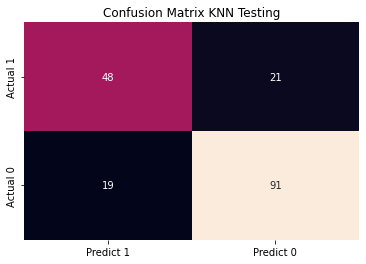

-------------------------------------------------------


,Predict 1,Predict 0
Actual 1,48,21
Actual 0,15,95


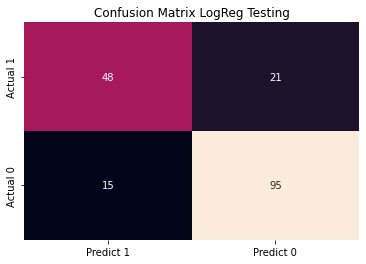

-------------------------------------------------------


,Predict 1,Predict 0
Actual 1,44,25
Actual 0,20,90


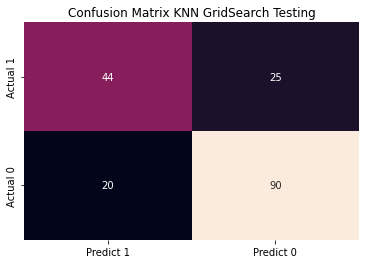

-------------------------------------------------------


,Predict 1,Predict 0
Actual 1,48,21
Actual 0,14,96


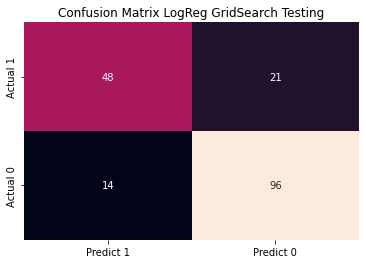

-------------------------------------------------------


,Predict 1,Predict 0
Actual 1,44,25
Actual 0,20,90


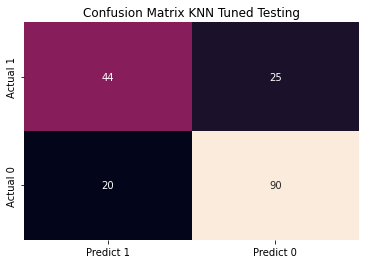

-------------------------------------------------------


,Predict 1,Predict 0
Actual 1,48,21
Actual 0,14,96


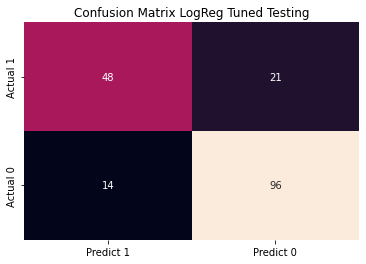

-------------------------------------------------------


In [80]:
## Confusion Matrix - Testing Set
for i in range(6):
    display(cm_test[i])
    sns.heatmap(cm_test[i],annot=True,cbar=False)
    plt.title(f'Confusion Matrix {name[i]} Testing')
    plt.show()
    print('-'*55)